
### 1.1  importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

### 1.2 messages intuition
sms messages classification as spam or not spam using uci data set from our intuition about spam sms we usuallly know that they contain url about the offer or concerned website. SMS spam messages are usually bulk messages containing short a short description, url, an offer/deal which is targeting a large set of users so the messages are generally short;

In [ ]:
#importing sms data set and undersatnding data
sms=pd.read_csv(r"C:\Users\SANTOSH A PATIL\Desktop\UDACITY COURE WORK\naive_bayes_tutorial-master\smsspamcollection\SMSSpamCollection.txt",sep='\t',header=None,names=['label','message'])
print(sms.head())
sms.describe()
sms.groupby('label').describe()


### 1.3 priliminary examination of the sms
we can infer that there are 747 spam messages and  4825 not spam messages and some messages have repeated more than once



### 1.4 Dropping duplicate sms in both spam and not spam

In [ ]:
sms.drop_duplicates(inplace=True)
sms.groupby('label').describe()

### 1.5 after dropping duplicate messages

the number of not spam messages dropped from 4825 to 4516 and and spam messages from 747 to 653

for further analysis from here we have more not spam messages than spam messages



### 1.6 Length of messages in both spam and not spam




In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()
plt.title('Histogram distribution of the spam and not spam messages')
sms['length'].hist(bins=60,figsize=(12,5))
plt.xlim(-40,900)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()



sms['length'].hist(by=sms['label'],bins=60,figsize=(12,5))
plt.xlim(-40,900);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

### 1.6.1 Inference from the length of sms
from the histogram distribution of both spam and not spam messages we can conclude that majority of the spam messages have a greater length. we can at this stage also conclude that if a message has a length greater than 150 we can infer that the sms will be a spam, but the accuracy of our ML model will be very less; hence for further analysis we should clean and preprocess the data;

### 1.7.1 Binarising labels has ham(not spam) as 0 and spam as 1

representing spam and not Spam(ham) as 1 and 0 makes it efficient for classifing messages

In [ ]:
sms['labels'] = sms['label'].map({'ham': 0, 'spam': 1})
sms.head()

# 2.0 SMS Cleaning and Wrangling

by simply going through the sms we see that they contain a lot of puntations, words which hinder the learning capabilities of the ML;
hence it is necessary to clean the sms;
to clean the sms:
1. remove punctuation using python's string 
2. remove word like 'him', 'and' which do not add much meaning to the message using stop words from nltk
3. re


#### 2.1 delete punctuations by using python string

In [ ]:
# function to delete punctuations by python string 
print('List of supported punctuations',string.punctuation)
def delete_punctuation(msg):
    new_msg=''.join([p for p in msg if p not in string.punctuation])
    return new_msg
sms['del_p_message']=sms['message'].apply(delete_punctuation)

sms['del_p_length'] = sms['del_p_message'].apply(len)
sms.head()

### 1.7.2 Visulising sms in terms of length before and after removing punstuations

In [ ]:
plt.title('Histogram distribution of the spam and not spam messages after deleting punctuations')
sms['del_p_length'].hist(bins=60,figsize=(12,5))
plt.xlim(-40,900)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


sms['del_p_length'].hist(by=sms['label'],bins=60,figsize=(12,5))
plt.xlim(-40,900);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

sms['length'].hist(bins=60,alpha=1,figsize=(12,5),label='true length')
sms['del_p_length'].hist(bins=60,alpha=0.5,figsize=(12,5),label='punctuation length')
plt.legend(loc='upper right')
plt.show()


### 2.2 Cleaning SMS by using STOP WORDS which are not informative enough to classify as spam or not spam

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

# definie function to delete stop words
def delete_stopwords(msgp):
    msg_no_stopwords=[x for x in msgp.split() if x.lower() not in stopwords.words("english")]
    return msg_no_stopwords
#word for word in text if word not in stopwords
#now send the Punctuation cleaned sms to the above function and store new sms in original data frame as sms_noSW

sms['del_SW_message']=sms['del_p_message'].apply(delete_stopwords)



In [ ]:
sms['del_SW_length']=sms['del_SW_message'].apply(len)
sms['del_SW_message'].head()
sms.head()

## 2.2.1 SMS cleaning and wrangling Visulization and comparing histogram with Punctuation removed words



In [ ]:
plt.title('Histogram distribution of the spam and not spam messages after deleting Stop words')
sms['del_SW_length'].hist(bins=60,figsize=(12,5))
plt.xlim(-40,900)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


sms['del_SW_length'].hist(by=sms['label'],bins=60,figsize=(12,5))
plt.xlim(-40,400);
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

sms['del_SW_length'].hist(bins=60,alpha=1,figsize=(12,5),label='no stopwords')
sms['del_p_length'].hist(bins=60,alpha=0.5,figsize=(12,5),label='punctuation length')
sms['length'].hist(bins=60,alpha=0.4,figsize=(12,5),label='true length')
plt.legend(loc='upper right')
plt.show()


#### 2.3 SMS word vizulization using wordcount

In [ ]:
#pictorially represent spam and not spam words using WordCloud
from wordcloud import WordCloud
spam_words = ' '.join(list(sms[sms['labels'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

notspam_words = ' '.join(list(sms[sms['labels'] == 0]['message']))
notspam_wc = WordCloud(width = 512,height = 512).generate(notspam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(notspam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
print(spam_words)

### 2.4 Visulizing the most frequent words in spam and not spam messsages

It is import to know the words that make up the bulk of the text messages that distinguishes a message from spam and not spam, beacuse these words in spam are used my marketers to get our attention in a message and click the link or collect an offer


In [58]:
from collections import Counter
#creating a list of spam and not spam words

spam_elements=[]
ham_elements=[]
for x,y in zip(sms['del_SW_message'],sms['labels']):
    if y==1:
        spam_elements.append(x)
    elif y==0:
        ham_elements.append(x)

spam_wordslist = []
for q in spam_elements:
    for w in q:
        spam_wordslist.append(w)

ham_wordslist = []
for sublist in ham_elements:
    for item in sublist:
        ham_wordslist.append(item)

count_spam  = Counter(spam_wordslist)
count_ham = Counter(ham_wordslist)
spam_top50  = pd.DataFrame(count_spam.most_common(50),  columns=['word', 'count'])
ham_top50 = pd.DataFrame(count_ham.most_common(50), columns=['word', 'count'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

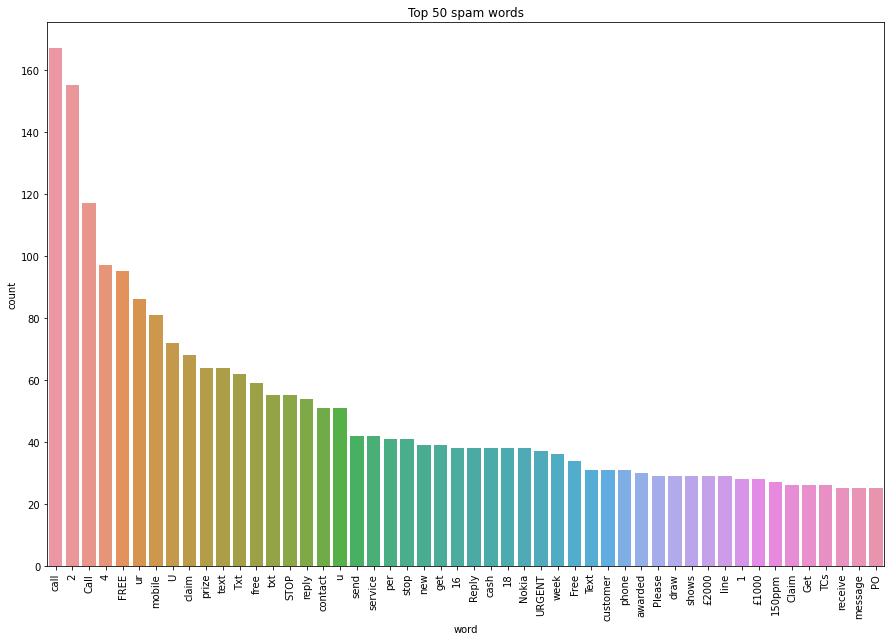

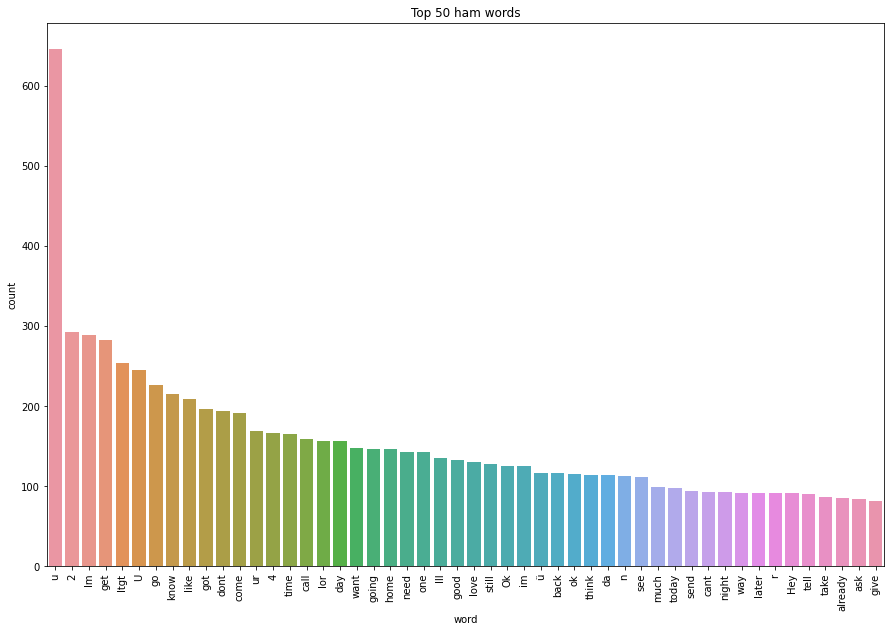

In [60]:
fig, axis = plt.subplots(figsize=(15, 10))
sns.barplot(x='word', y='count',data=spam_top50, ax=axis)
plt.title("Top 50 spam words")
plt.xticks(rotation='vertical')

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='word', y='count',data=ham_top50, ax=ax)
plt.title("Top 50 ham words")
plt.xticks(rotation='vertical')


### 2.5 the words into training set and test test



In [ ]:
#splitting data into training and test data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(sms['del_SW_message'],sms['labels'], random_state=1)
print('Training messages size',xtrain.shape[0])
print('Testing messages size',xtest.shape[0])

### 2.5 Create Bag of Words using Count vectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = sms['del_SW_message']).fit(sms['message'])